In [1]:
%matplotlib inline

import os
import json
import math
import sys
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
from matplotlib.dates import date2num

notebook_path = !pwd
prj_path = os.path.abspath(os.path.join(notebook_path[0], '../', ''))
sys.path.append(prj_path)
print('Added: %s' % prj_path)

Added: /Users/lsanchez/omath_mota_rulo


In [2]:
from data_scientia import config
from data_scientia.data import capacidad_hospitalaria
from data_scientia.data import municipios
from data_scientia.features import critical_peaks
from data_scientia.features import target_days_to_peak
from data_scientia.features import hospital
from data_scientia.features import train_data
from data_scientia.visualization import hospital_timeline

/Users/lsanchez/anaconda3/envs/data_scientia/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/lsanchez/anaconda3/envs/data_scientia/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
dataset = train_data.get()

In [4]:
municipio_codes_dict = municipios.get_municipio_codes()

/Users/lsanchez/anaconda3/envs/data_scientia/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [5]:
config.VERBOSE = False

data = capacidad_hospitalaria.get()
data.shape

(17011, 15)

In [6]:
peaks_data = critical_peaks.get()
peaks_data.shape

/Users/lsanchez/omath_mota_rulo/data_scientia/features/critical_peaks.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_data.sort_values('fecha', inplace=True)


(301, 6)

In [7]:
days_to_peak_data = target_days_to_peak.get()
days_to_peak_data.shape

(10803, 22)

In [8]:
n_samples = 5

sample_hospitals = data[
    data['estatus_capacidad_uci'] == 'Crítica'
][
    'nombre_hospital'
].drop_duplicates().sample(
    n_samples, 
    random_state=0)

hospital_name = sample_hospitals.iloc[2]

hospital_name

'HOSPITAL GENERAL DE ZONA 58 (LAS MARGARITAS)'

In [9]:
# Get neighbor municipios daily cases

In [10]:
neighbor_municipios_daily_cases = hospital.get_neighbor_municipio_daily_cases(
    hospital_name, 
    max_meters=15e+3)

neighbor_municipios_daily_cases.columns = [
    municipio_codes_dict[x] for x in 
    neighbor_municipios_daily_cases.columns]

In [11]:
dataset_hospital = dataset[
    dataset['nombre_hospital'] == hospital_name
].set_index('fecha')

# Hospitals timeline

In [12]:
target_name = 'is_next_peak_in_15_days'

NameError: name 'ax_' is not defined

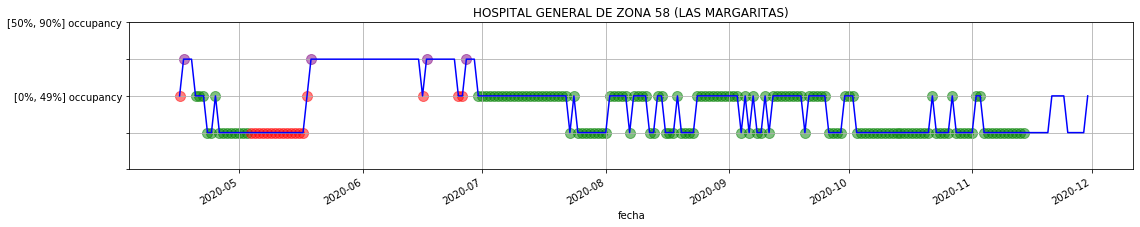

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(18, 3))

hospital_timeline.plot_hospital_timeline(
    hospital_name, 
    ax, 
    target_name=target_name)
ax.set_yticklabels([
    '',
    '',
    '[0%, 49%] occupancy', 
    '',
    '[50%, 90%] occupancy',
    '',
    '[90%, 100%] occupancy'],
    )


neighbor_municipios_daily_cases = neighbor_municipios_daily_cases.loc[
    data[data['nombre_hospital'] == hospital_name]['fecha'].min():
    data[data['nombre_hospital'] == hospital_name]['fecha'].max()]

covid_cases = neighbor_municipios_daily_cases.sum(axis=1)

data_plot = (covid_cases / 700)
data_plot.name = 'daily_covid19_cases'
data_plot.plot(
    ax=ax_,
    legend=True,
    alpha=.5,
    grid=True,
    color='gray')

data_plot = (covid_cases.rolling(window=7).sum() / 1200)
data_plot.name = 'sum_covid19_cases_last_7_days'
data_plot.plot(
    ax=ax_,
    legend=True,
    alpha=.5,
    grid=True,
    color='gray')

fig.set_tight_layout('tight')

In [ ]:
neighbor_municipios_daily_cases = neighbor_municipios_daily_cases.loc[
    data[data['nombre_hospital'] == hospital_name]['fecha'].min():
    data[data['nombre_hospital'] == hospital_name]['fecha'].max()]

features = [
    'contagios_sum_7_days_skewness',
    'contagios_sum_15_days_skewness', 
    'contagios_sum_7_days_kurtosis',
    'contagios_sum_7_days_count_below_mean'
]

dataset.set_index('fecha')[features].plot(
    alpha=.5)
# covid_cases.plot()

In [ ]:
features = [
    'contagios_sum_7_days_maximum']

dataset.set_index('fecha')[features].plot(
    alpha=.5)

covid_cases.rolling(window=7).sum().plot()

In [ ]:
covid_cases.rolling(window=7).sum().plot()